# Bibliotecas e CSV

In [198]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D
import seaborn as sns

In [199]:
#Mudar caminho absoluto
df = pd.read_csv('C:\\Users\\cotoq\\PycharmProjects\\Teste_Analytics_MarcusGuerra\\data-sets\\data_clean.csv')

#como o pandas não salva o df com o tipo datetime, ele volta a ser string, devemos transformar em datetime novamente
df['Data'] = pd.to_datetime(df['Data'])

para facilitar a visualisação dos graficos e deixar o notebook menos poluido, todas as funções para gerar os gráficos serão armazenadas aqui

# Funções

In [200]:
def plot_mais_vendidos(df, coluna, titulo, cor_paleta):

    produto_agrupado = df.groupby(coluna)['Quantidade'].sum().reset_index()

    produto_agrupado = produto_agrupado.sort_values(by='Quantidade', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.bar(produto_agrupado[coluna], produto_agrupado['Quantidade'], color=cor_paleta)
    ax = plt.gca()
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    plt.grid(True, axis='y', linewidth=1.3, color='lightgray')

    #Deixa o fundo branco, e remove as linhas que ficam em volta do gráfico
    plt.gca().set_facecolor('white')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.title(titulo, fontsize=26)

    plt.setp( ax.xaxis.get_majorticklabels(), rotation=45, ha="right", rotation_mode="anchor" )
    plt.tight_layout()
    #salva como pdf para usar na documentação
    plt.savefig(titulo, format='pdf')
    plt.show()


In [201]:
def plot_vendas_mensais(df, title):
    #Para evitar poluir o df original, podendo gerar problemas com outras visualisações, e como esse é um df pequeno, podemos fazer uma cópia dele e trabalhar apenas com a cópia
    df_venda_mes = df

    #Divide o total de vendas por 1 milhão para facilitar a visualização
    df_venda_mes['VendasMilhao'] = df_venda_mes['Vendas'] / 1e6

    #Cria uma coluna 'Ano_Mes' no DataFrame 'df_venda_mes', onde as datas são convertidas para o formato de período mensal ('M').
    df_venda_mes['Ano_Mes'] = df_venda_mes['Data'].dt.to_period('M')

    # Agrupa os dados por 'Ano_Mes' e calcula a soma das vendas ('VendasMilhao') para cada mes
    vendas_mensais = df_venda_mes.groupby('Ano_Mes')['VendasMilhao'].sum()

    # Modifica o índice de 'vendas_mensais' para exibir o nome do mês
    vendas_mensais.index = vendas_mensais.index.strftime('%b')

    media_vendas = vendas_mensais.mean()

    plt.figure(figsize=(10, 6))

    plt.plot(vendas_mensais.index, vendas_mensais, marker='o', color='b', label='Vendas Mensais')

    #muda as cores dos pontos
    for i in range(len(vendas_mensais)):
        if vendas_mensais.iloc[i] < media_vendas:
            plt.plot(vendas_mensais.index[i], vendas_mensais.iloc[i], marker='o', color='r')  # Vermelho para abaixo da média
        else:
            plt.plot(vendas_mensais.index[i], vendas_mensais.iloc[i], marker='o', color='b')  # Azul para acima da média


    plt.xticks(ticks=range(len(vendas_mensais)), labels=vendas_mensais.index, rotation=45, ha='right')

    plt.title(title, fontsize=26)

    # Formata o eixo Y para facilitar a compreensão dos valores e adiciona um M ao lado
    # texto
    formatter = FuncFormatter(lambda x, pos: f'{int(x):,}M')
    plt.gca().yaxis.set_major_formatter(formatter)

    #adiciona a legenda colorida
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor='b', markersize=10, label='Acima da Média'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=10, label='Abaixo da Média')
    ]
    plt.legend(handles=legend_elements, loc='upper right')

    #aumenta o tamanho da fonte do eixo X e Y
    ax = plt.gca()
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    plt.grid(True, axis='y', linewidth=1.3, color='lightgray')

    #Deixa o fundo branco, e remove as linhas que ficam em volta do gráfico
    plt.gca().set_facecolor('white')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)

    plt.tight_layout()

    plt.grid(True)
    #salva como pdf para usar na documentação
    #plt.savefig(title, format='pdf')
    plt.show()

In [202]:
def plot_boxplot_categoria(df, palette, title, eixo_y):

    plt.figure(figsize=(10, 6))

    #Faz o boxplot da categoria pelo eixo_y escolhido
    sns.boxplot(x='Categoria', y=eixo_y, data=df, hue='Categoria', palette=palette, dodge=False)
    plt.title(title, fontsize=24)
    plt.grid(True, axis='y', linewidth=1.3, color='lightgray')
    ax = plt.gca()

    #Deixa o fundo branco, e remove as linhas que ficam em volta do gráfico
    ax.set_facecolor('white')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    #aumenta o tamanho do texto do eixo X e Y
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_ylabel('')
    ax.set_xlabel('')

    plt.tight_layout()

    #salva como pdf para usar na documentação
    #plt.savefig(title, format='pdf')
    plt.show()

In [203]:
def plot_vendas_diarias(df, title):

    #para evitar poluir o df original, podendo gerar problemas com outras visualisações, e como esse é um df pequeno, podemos fazer uma cópia dele e trabalhar apenas com a cópia
    df_vendas_dia = df
    df_vendas_dia['Dia_Semana'] = df_vendas_dia['Data'].dt.day_name()

    #dividir o total de vendas por 1 milhão para facilitar a visualização
    df_vendas_dia['VendasMilhao'] = df_vendas_dia['Vendas'] / 1e6

    vendas_por_dia = df_vendas_dia.groupby('Dia_Semana')['VendasMilhao'].sum()

    ordem_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


    # Reorganiza o índice do DataFrame 'vendas_por_dia' para corresponder à ordem definida na lista 'ordem_dias'.
    vendas_por_dia = vendas_por_dia.reindex(ordem_dias)

    #Adiciona um M ao lado do texto do eixo Y para facilitar a compreensão
    formatter = FuncFormatter(lambda x, pos: f'{int(x):,}M')


    plt.figure(figsize=(10, 6))

    ax = vendas_por_dia.plot(kind='bar', color='b', edgecolor='black')
    ax.yaxis.set_major_formatter(formatter)

    #aumenta o tamanho do texto do eixo X e Y
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    plt.grid(True, axis='y', linewidth=1.3, color='lightgray')

    #Deixa o fundo branco, e remove as linhas que ficam em volta do gráfico
    plt.gca().set_facecolor('white')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)


    plt.title(title, fontsize=26)
    plt.xlabel('')

    plt.xticks(rotation=45)

    plt.tight_layout()
    #salva como pdf para usar na documentação
    #plt.savefig(title, format='pdf')
    plt.show()

#  Análise Exploratória

Paleta de cores para padronizar os gráficos

In [204]:
categorias = df['Categoria'].unique()
palette_categoria = sns.color_palette("Dark2", len(categorias))

produtos = df['Produto'].unique()
palette_produtos = sns.color_palette("Accent", len(produtos))

## Distribuição de Produtos/Vendas por Categoria

Plota o valor das vendas por categoria, onde podemos observas as discrepencias principalmente entre as categorias com maiores vendas (Laptops, Smartphones e Fotografia) para as categorias com menores vendas(Eletronicos, Acessorios e Audio)

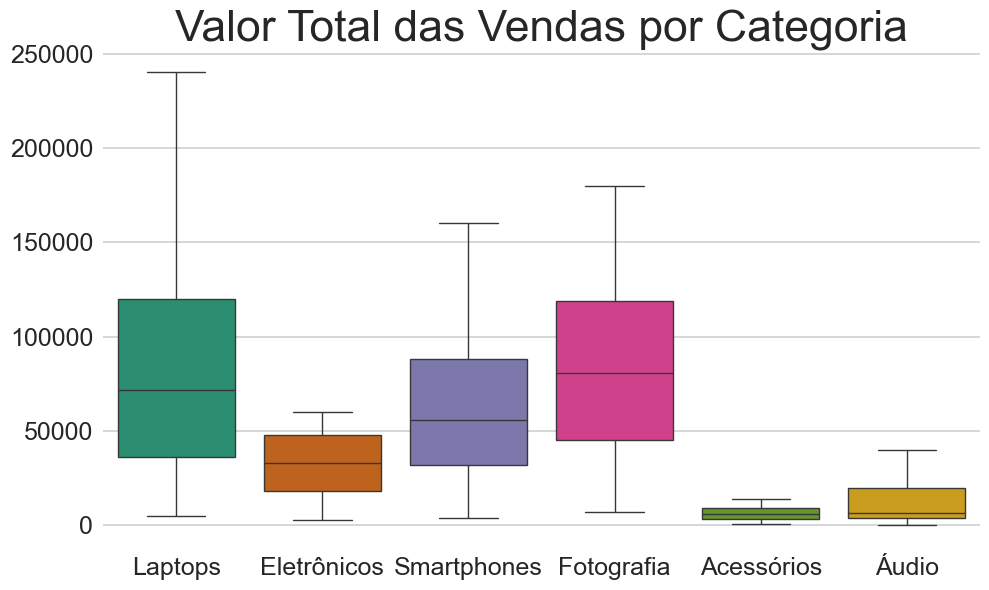

In [205]:
plot_boxplot_categoria(df, palette_categoria, 'Valor das Vendas por Categoria', 'Vendas')

Plota a quantidade de itens vendidos por categoria, demonstrando que toda categoria vende quase a mesma quantidade de itens por venda.

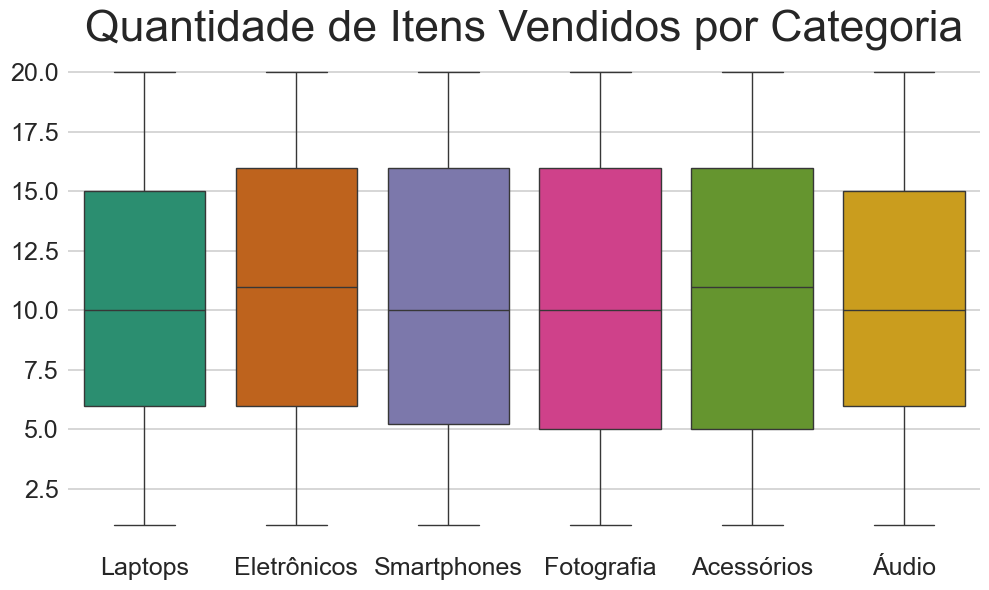

In [206]:
plot_boxplot_categoria(df, palette_categoria, 'Quantidade de Itens por Venda', 'Quantidade')

##  Tendência de Vendas ao Longo do Tempo

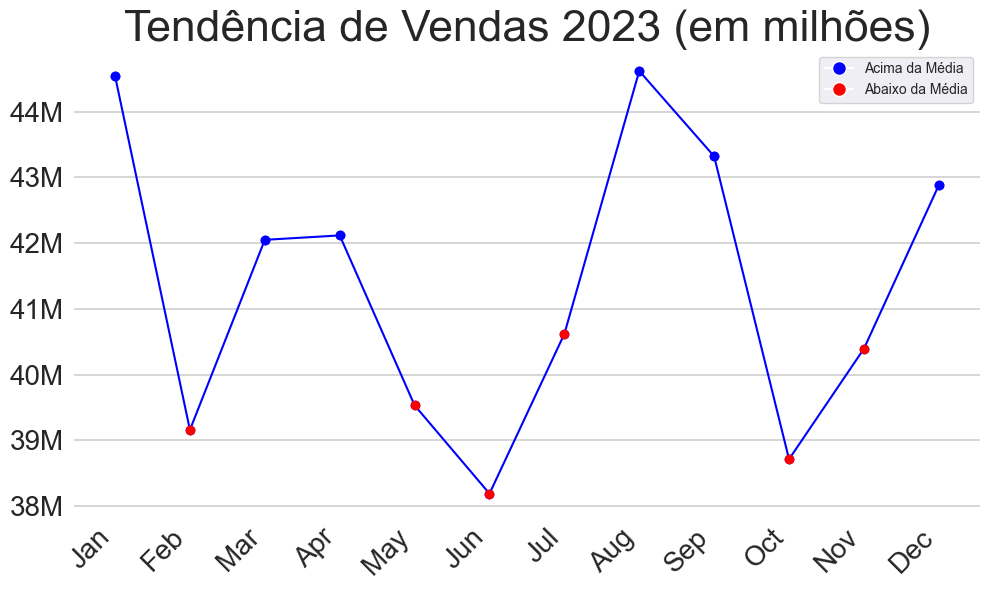

In [207]:
plot_vendas_mensais(df, 'Tendência de Vendas 2023 (em milhões)')

Demonstra a quantidade de vendas por dia, que nos ajuda a observar os menos picos de vendas diarias (quarta-feira e sexta-feira) dos maiores(quinta-feira e domingo)

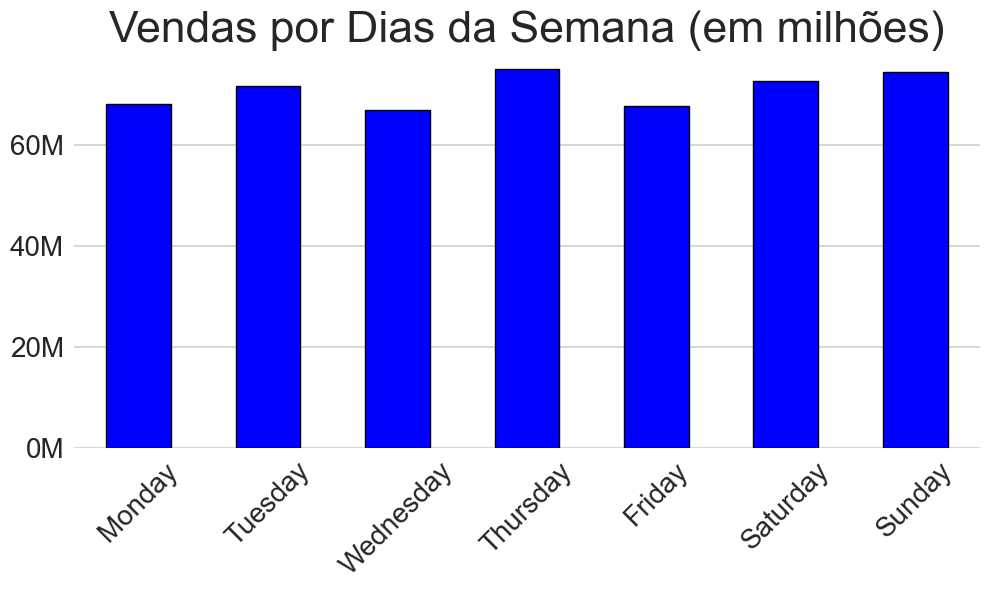

In [208]:
plot_vendas_diarias(df, 'Vendas por Dias da Semana (em milhões)')

## Produtos Mais Vendidos

Monstra os produtos mais vendidos, que nos permite observas quais produtos são importantes sempre ter em estoque (Câmera Sony principalmente)

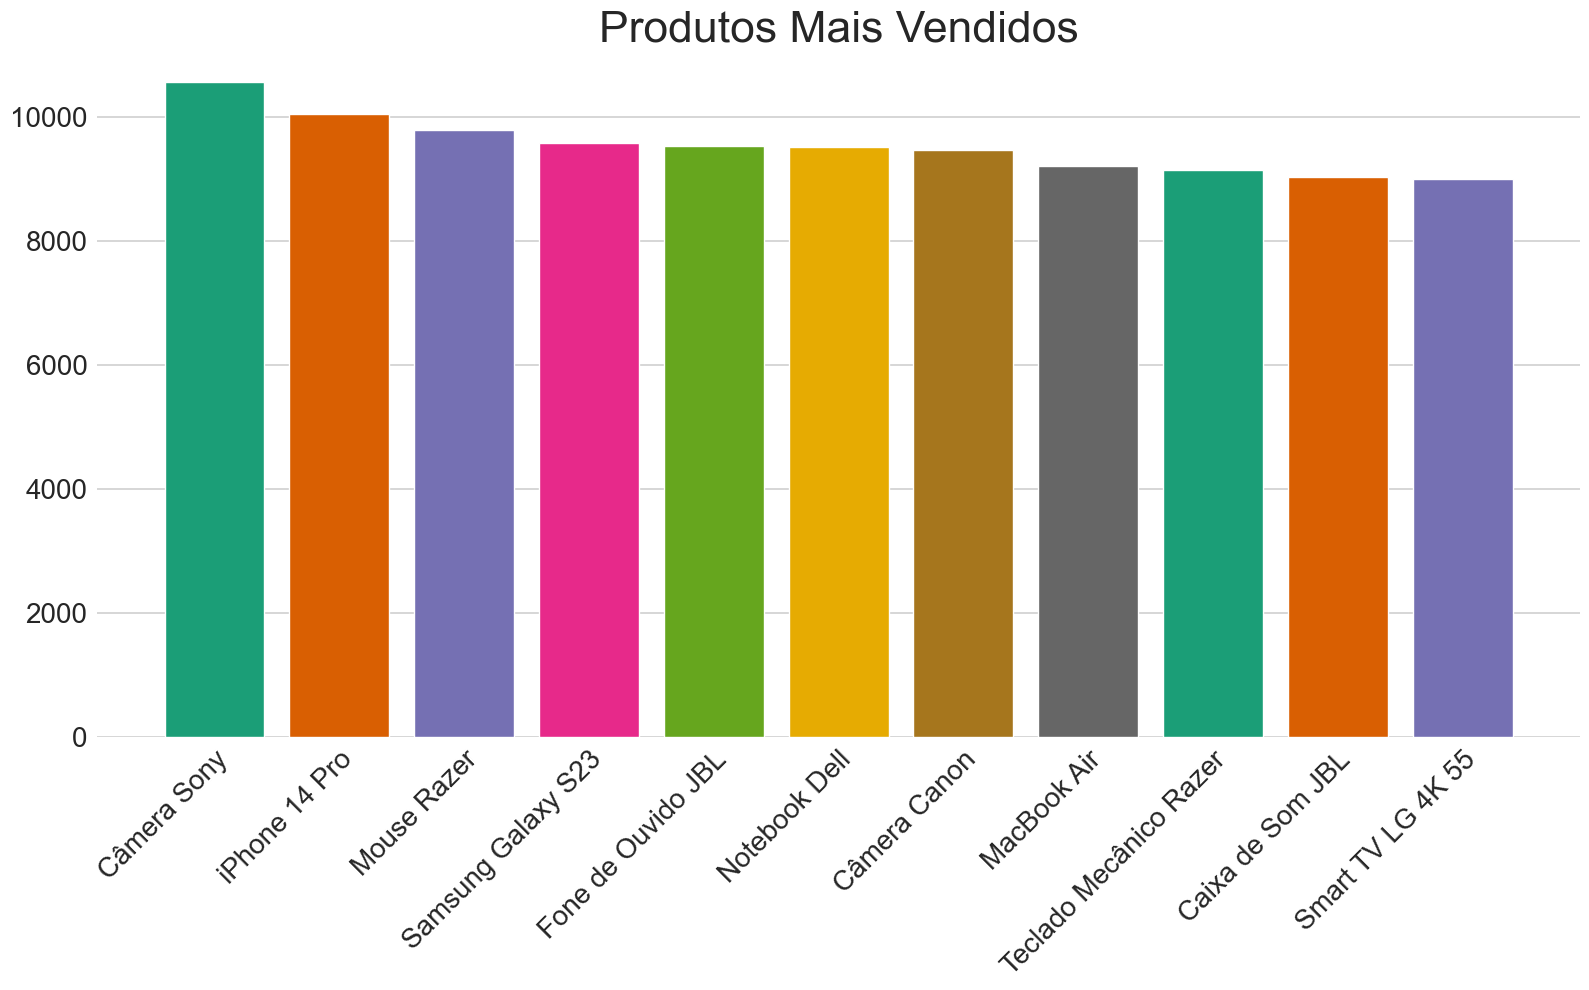

In [209]:
plot_mais_vendidos(df,'Produto', 'Produtos Mais Vendidos', palette_produtos)